<p float="left">

  <img src="https://avatars.githubusercontent.com/u/22799945?s=200&v=4" width="15%" align="left"/> <h1> Seguimos visualizando ...
  
  [Seaborn](https://seaborn.pydata.org/) es una librería que si bien puede funcionar junto a `matplotlib` (es decir, utilizar una figura y ejes), tiene sus particularidades o diferencias. Una de las primeras que podemos mencionar es que tiene un enfoque bastante orientado a análisis estadístico. Incluso, es interesante ver cómo sus métodos dialogan más directamente con la estructura de la base de datos que se está trabajando. De hecho, integra muy bien con `pandas`.                                        
</p> 

<img src="https://github.com/institutohumai/pyeph/blob/main/docs/_static/logo.png?raw=true" width="9%" align="right"/> Veamos algunos ejemplos de lo que podemos hacer con esta librería. Para eso, vamos a seguir trabajando con `pyeph`. En su repositorio pueden revisar algunos [casos de uso](https://github.com/institutohumai/pyeph/blob/main/examples.ipynb). Nosotros vamos a seguir profundizando sobre los de vivienda.

In [ ]:
# instalamos pyeph, una librería que facilita la consulta y procesamiento de la Encuesta Permanente de Hogares
#!pip install pyeph

# actualizamos matplotlib
#!pip install matplotlib --upgrade

In [ ]:
import matplotlib as mpl
mpl.__version__

'3.5.2'

In [ ]:
# importamos pyeph y pandas
import pyeph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Series de tiempo, barras y otras yerbas ...

Lo primero que vamos a revisar es la evolución de los inquilinos en el tiempo a lo largo de las 6 regiones que releva la EPH.

In [ ]:
# Creamos un diccionario para mapear el nombre de la región
regiones = {1:'Gran Buenos Aires',40:'NOA',41:'NEA',42:'Cuyo',43:'Pampeana',44:'Patagónica'}

In [ ]:
# Con esta función vamos a consultar el porcentaje y el total de inquilinos por región
def get_queryxregion(base, query_str, region, pct=True):
  base=base.query(f'REGION=={region}') # filtra la base para la región del parámetro
  inqui = base.query(query_str)['PONDERA'].sum() # total de inquilinos
  total = base['PONDERA'].sum() # denominador para
  
  if pct:
    result = round((inqui/ total) * 100,2) # estimar el % de inquilinos
  else:
    result = inqui
  return result

In [ ]:
# Aplicamos nuestra función
desde = 2004
hasta = 2022

resultados = []
for anio in range(desde, hasta +1): # iterando sobre el 4 trim de todos los años
  try:
    # traemos la base del año iterado
    base = pyeph.get(data="eph", year=anio, period=4, base_type='hogar') 
    
    # recorremos el diccionario de regiones
    for region_idx, region in regiones.items():
      inquilinos = get_queryxregion(base,'II7==3', region_idx, pct=False)
      inquilinos_pct = get_queryxregion(base,'II7==3', region_idx, pct=True)
      viv_en_vill = get_queryxregion(base,'IV12_3==1', region_idx, pct=False)
      viv_en_vill_pct = get_queryxregion(base,'IV12_3==1', region_idx, pct=True)

      # y apendeamos a nuestra lista los resultados de la query
      resultados.append({'año': anio,
                         'region':region,
                         'inquilinos':inquilinos, 
                         'inquilinos_pct':inquilinos_pct,
                         'vivenvill':viv_en_vill,
                         'vivenvill_pct':viv_en_vill_pct})
  except:
    pass


Obtenido con exito: base_hogar_2004T4.zip 

Obtenido con exito: base_hogar_2005T4.zip 

Obtenido con exito: base_hogar_2006T4.zip 
INDEC advierte:
Advertencia sobre el uso de series estadisticas. Se advierte que las series estadisticas publicadas con
posterioridad a enero del 2007 y hasta diciembre 2015 deben ser consideradas con reservas,
excepto las que ya hayan sido revisadas en 2016 y su difusion lo consigne expresamente.
El INDEC, en el marco de las atribuciones conferidas por los decretos 181/15 y 55/16, dispuso las investigaciones
requeridas para establecer la regularidad de procedimientos de obtencion de datos, su procesamiento, elaboracion de indicadores y difusion
Mas informacion en: https://www.indec.gob.ar/ftp/cuadros/sociedad/anexo_informe_eph_23_08_16.pdf
Obtenido con exito: base_hogar_2007T4.zip 
INDEC advierte:
Advertencia sobre el uso de series estadisticas. Se advierte que las series estadisticas publicadas con
posterioridad a enero del 2007 y hasta diciembre 2015 de

In [ ]:
# este es el dataframe que construimos con la consulta
inquilinos_df = pd.DataFrame(resultados)

In [ ]:
inquilinos_df

,año,region,inquilinos,inquilinos_pct,vivenvill,vivenvill_pct
0,2006,Gran Buenos Aires,592749,15.25,61891,1.59
1,2006,NOA,77940,13.50,7698,1.33
2,2006,NEA,45399,14.09,19265,5.98
3,2006,Cuyo,69087,16.01,10150,2.35
4,2006,Pampeana,361847,20.55,32580,1.85
...,...,...,...,...,...,...
67,2021,NOA,102342,13.10,4745,0.61
68,2021,NEA,60145,13.50,11023,2.47
69,2021,Cuyo,111029,19.44,1679,0.29
70,2021,Pampeana,506026,22.61,16956,0.76


In [ ]:
inquilinos_df['año'].unique() # la consulta no fue exitosa para todos los años (por eso, el try/except)

array([2006, 2008, 2009, 2010, 2013, 2014, 2016, 2017, 2018, 2019, 2020,
       2021])

In [ ]:
# un año se ve así
inquilinos_df.loc[inquilinos_df['año']==2006]

,año,region,inquilinos,inquilinos_pct,vivenvill,vivenvill_pct
0,2006,Gran Buenos Aires,592749,15.25,61891,1.59
1,2006,NOA,77940,13.50,7698,1.33
2,2006,NEA,45399,14.09,19265,5.98
3,2006,Cuyo,69087,16.01,10150,2.35
4,2006,Pampeana,361847,20.55,32580,1.85
5,2006,Patagónica,49166,21.23,2567,1.11


In [ ]:
# pasamos el df a formato ancho
inquilinos_wide = inquilinos_df.pivot("año", "region", "inquilinos_pct")

In [ ]:
from matplotlib.ticker import FuncFormatter # con esta clase vamos a formatear ejes

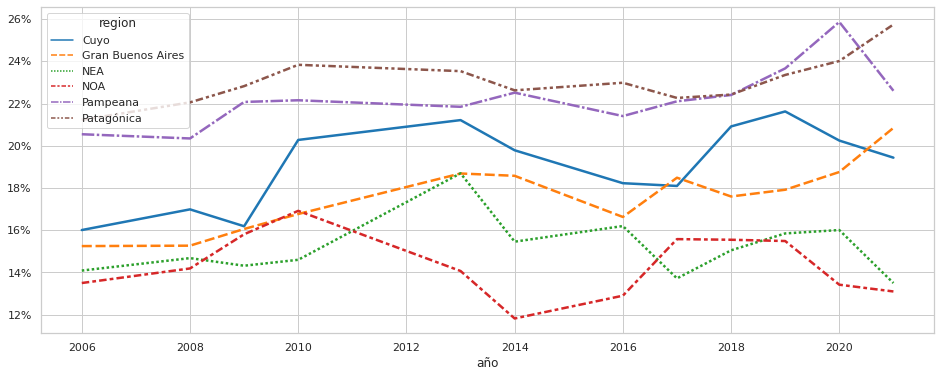

In [ ]:
sns.set_theme(style="whitegrid") # agregamos la grilla de ejes xy

plt.figure(figsize=(16,6)) # creamos la figura
sns.lineplot(data=inquilinos_wide, palette="tab10", linewidth=2.5) # ploteamos nuestra serie

# formateamos los ejes
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{}%'.format(int(y))));

Ahora sí, podemos ver cómo es la evolución porcentual de inquilinos entre 2006 y 2020 para las seis regiones del país.

In [ ]:
import numpy as np

Con `seaborn` también podemos plotear muchos de los gráficos que vimos con `matplotlib`. Sólo que, como dijimos, la usabilidad es un poco distinta.

In [ ]:
# creamos una nueva variable con valores categoricos para distinguir la población en villas y asentamientos
base['IV12_3_'] = base['IV12_3'].replace({1:'SI', 2:'NO'})

Un gráfico de barras representa, generalmente, alguna medida de tendencia central. Como dijimos seaborn está pensada para este tipo de análisis. De allí que, por defecto, nos permita ver el estadístico sin tener que agrupar. Si se fijan con detenimiento, también nos muestra el intervalo de confianza con el que se estima nuestra medida de tendencia.

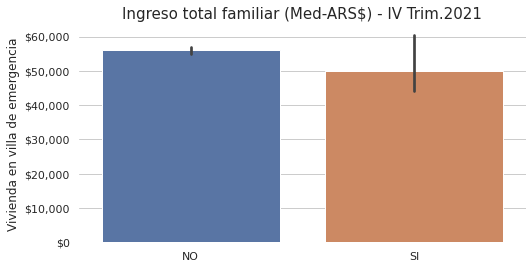

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='IV12_3_', y='ITF', estimator=np.median, data=base, ax=ax) # ploteamos las barras

for pos in ['top', 'bottom', 'right', 'left']:
  ax.spines[pos].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Vivienda en villa de emergencia')

# Formateamos el eje y
ax.set_title('Ingreso total familiar (Med-ARS$) - IV Trim.2021', fontdict={'fontsize':15})
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.0f}'.format(int(y))));

## Dimensiones múltiples!

Mientras Matplotlib permite trabajar con figures dispuestas en ejes(`ax`), seaborn también permite ajustar la estructura del plot a la del dataset. Esto, a partir de la clase `sns.FacetGrid`. Esta cualidad nos puede resultar muy útil cuando queremos ver un mismo gráfico para los distintos valores de una variable categórica. Por ejemplo ...

### Con FacetGrid y desde la clase de ploteo

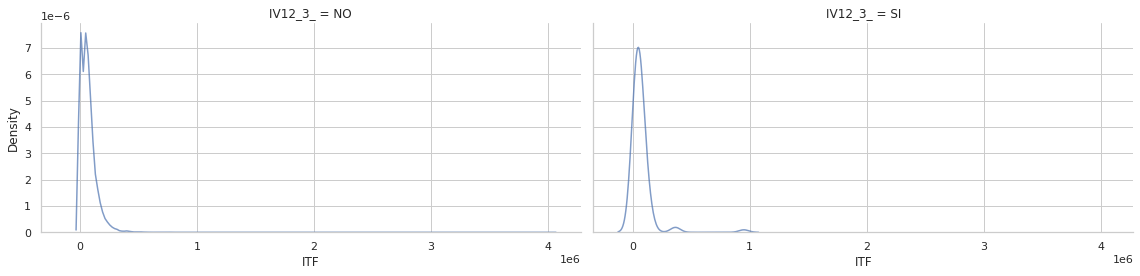

In [ ]:
# Evaluamos la curva de densidad para los hogares que viven en una villa y para los que no
g = sns.FacetGrid(base, col="IV12_3_",
                  height=4, aspect=2, legend_out=True) # inicializo la doble grilla
g.map(sns.kdeplot, "ITF", alpha=0.7);

In [ ]:
new_vals = {1:'Propietarios',2:'Propietarios',3:'Inquilinos', 5:'Inquilinos', 
            4:'Ocupantes legales', 6:'Ocupantes legales', 8:'Ocupantes legales',
            7:'Ocupantes ilegales y otros', 0:'Ocupantes ilegales y otros'}
base['II7_'] = base['II7'].map(new_vals)

In [ ]:
base['II7_'].value_counts()

Propietarios                  12148
Inquilinos                     3205
Ocupantes legales              1600
Ocupantes ilegales y otros       57
Name: II7_, dtype: int64

A continuación, vamos a ver un ejemplo de cómo seaborn puede devolver un objeto figura con ejes como atributos.

El objeto `g` que creamos con la clase FacetGrid tiene métodos que nos permiten operar sobre la figura misma para estilizarla. 

Lo que vamos a hacer es evaluar la distribución de ingresos por condición de ocupación de la vivienda discriminando si el respondente vive o no en una villa/asentamiento informal.

In [ ]:
import matplotlib.ticker as tkr

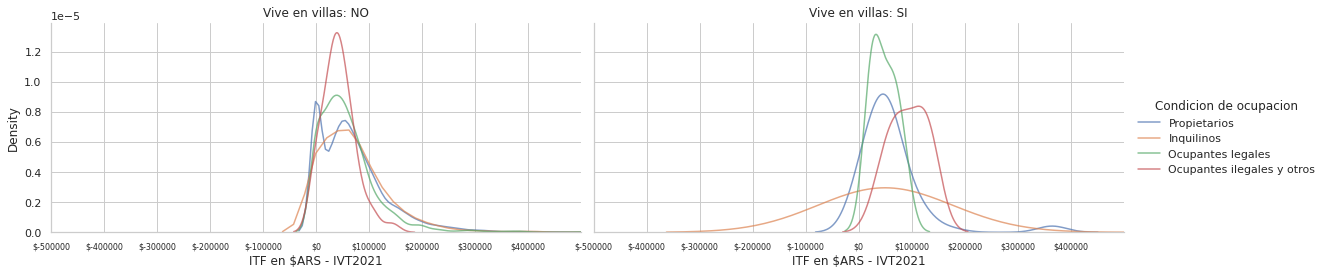

In [ ]:
# Evaluamos la curva de densidad para los hogares que viven en una villa y para los que no
bottom_lim = -500000 #0

# creamos una grilla
g = sns.FacetGrid(base, col="IV12_3_", hue="II7_", xlim=(bottom_lim,500000),
                  height=4, aspect=2, legend_out=True) # inicializo la doble grilla

# se mapea una función de ploteo a la grilla dispuesta en columnas
g.map(sns.kdeplot, "ITF", alpha=0.7)

# Estilizamos
g.add_legend(title="Condicion de ocupacion")
g.set_titles("Vive en villas: "+"{col_name}")
g.set_xlabels("ITF en $ARS - IVT2021")

# esta es una alternativa a la clase "set_major_formatter" que usamos en el lineplot
xtick_labels = np.arange(bottom_lim, 500000, 100000)
g.set(xticks=xtick_labels)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.xaxis.set_major_formatter(
        tkr.FuncFormatter(lambda x, p: "${:.0f}".format(x))); 

Para una correcta interpretación, no perder de vista que el área bajo la curva suma 1. Probablemente, la cantidad de ceros en nuestra muestra y la poca cantidad de casos esté generando curvas tan aplanadas.

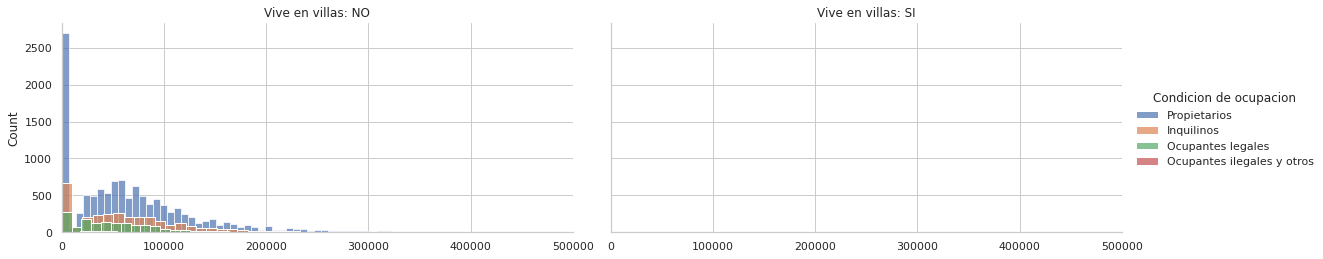

In [ ]:
# Vemos las frecuencias absolutas con un histograma
g = sns.FacetGrid(base, col="IV12_3_", hue="II7_", xlim=(0,500000),
                  height=4, aspect=2, legend_out=True) # inicializo la doble grilla
g.map(sns.histplot, "ITF", alpha=0.7)
g.add_legend(title="Condicion de ocupacion")
g.set_titles("Vive en villas: "+"{col_name}")
g.set_xlabels("");

In [ ]:
# Efectivamente, ...
base.groupby(['IV12_3_','II7_'])['ITF'].size()

IV12_3_  II7_                      
NO       Inquilinos                     3187
         Ocupantes ilegales y otros       50
         Ocupantes legales              1594
         Propietarios                  12078
SI       Inquilinos                       18
         Ocupantes ilegales y otros        7
         Ocupantes legales                 6
         Propietarios                     70
Name: ITF, dtype: int64

... las frecuencias absolutas para las categorías de respuesta `IV12_3_`/`SI` son pocas. Asimismo, la cantidad de ceros hace que, para alcanzar un area de suma 1, tengamos valores negativos.

In [ ]:
base.loc[(base['IV12_3_']=='SI') & (base['II7_']=='Inquilinos'), 'ITF'].value_counts()

0         3
130000    2
80000     1
29000     1
29500     1
12600     1
49800     1
30000     1
45000     1
100000    1
49600     1
950000    1
70000     1
64000     1
48000     1
Name: ITF, dtype: int64

## Pensando asociaciones entre variables ...

Vamos a suponer que nos interesa evaluar alguna medida de "presión habitacional" sobre una ciudad. Para eso, intentaremos evaluar cómo se comportan dos variables a lo largo de un período de tiempo: la cantidad de inquilinos y de población en villas. 

La clase `relplot` de seaborn es bastante útil para esto. Principalmente porque nos permite relacionar distintas variables apelando a una amplia gama de recursos. 

Para ver cómo creció la demanda habitacional a lo largo de las seis regiones, vamos primero a disponer en el eje x la cantidad de población en villas y asentamientos. En el eje y, la de inquilinos. Además, vamos a etiquetar los años con una gama secuencial y a establecer el tamaño de las burbujas en función de la proporción de población viviendo en villas.


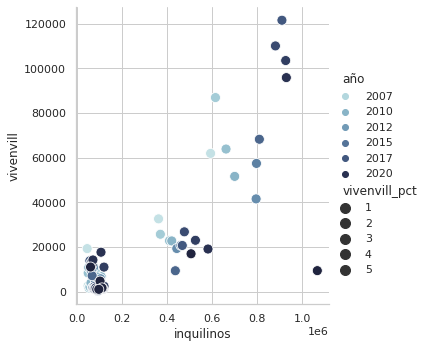

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True) # elegimos un color

sns.relplot(
    data=inquilinos_df,
    x="inquilinos", 
    y="vivenvill",
    hue="año", # establece el color
    size="vivenvill_pct", #establece el tamaño de la burbuja
    palette=cmap, 
    sizes=(100,100),
    facet_kws={'sharey': False, 'sharex': True});

Algunas clases de seaborn permiten definir la grilla a partir de los parámetros row y col. En el caso del `relplot`, no es necesario crear una grilla con FacetGrid.

En relación al output. Prece difícil encontrar alguna información útil. Al estar todas las regiones mezcladas no se llega a entender qué año corresponde a cada una. Por eso, es posible que todavía necesitemos hacer algunos ajustes adicionales. Uno podría ser, disponer la grilla en columnas a partir de la variable "región".

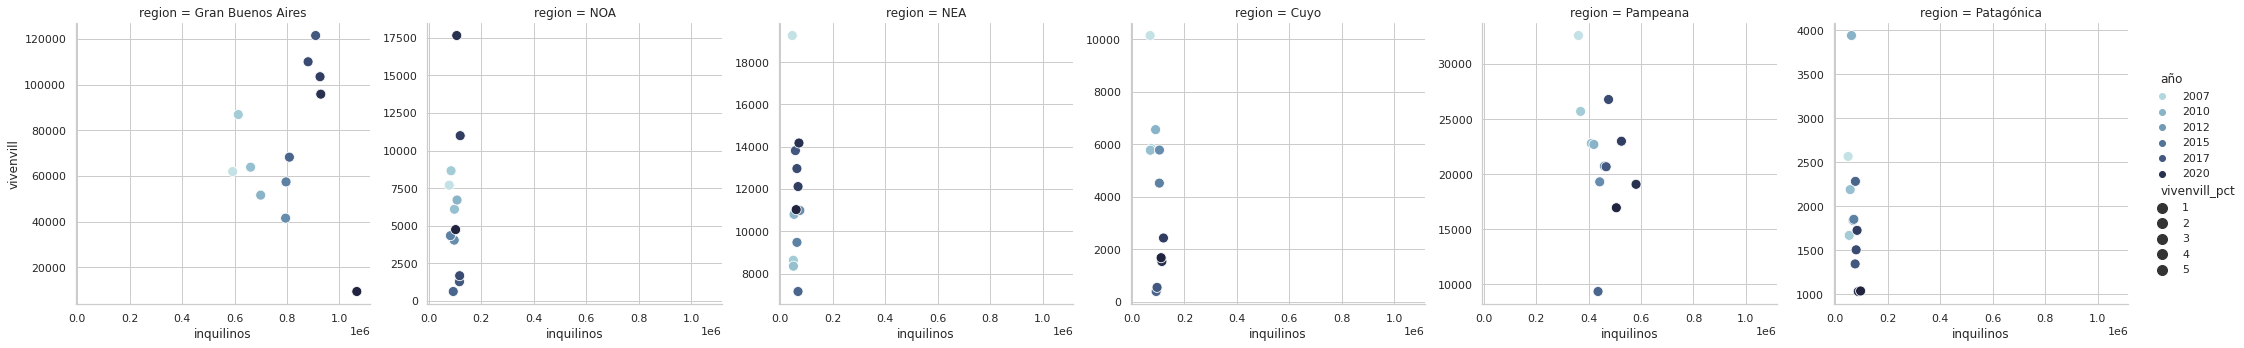

In [ ]:
sns.relplot(
    data=inquilinos_df,
    x="inquilinos", 
    y="vivenvill",
    hue="año", 
    size="vivenvill_pct",
    palette=cmap, 
    sizes=(100,100),
    col='region', # esto es como el row/col de FacetGrid
    facet_kws={'sharey': False, 'sharex': True} # aca podemos definir que ejes compartor
    );

Parecería mejorar, aunque sigue sin ser del todo claro. Probemos ahora ploteando un aglomerado contra el restro.

In [ ]:
# Por ejemplo con Gran Buenos Aires
es_agba = lambda x: x == 'Gran Buenos Aires'

In [ ]:
# Con la función anónima determinamos si es verdadero o falso que cada valor sea "Gran Buenos Aires"
inquilinos_df['AGBA'] = inquilinos_df['region'].apply(es_agba)

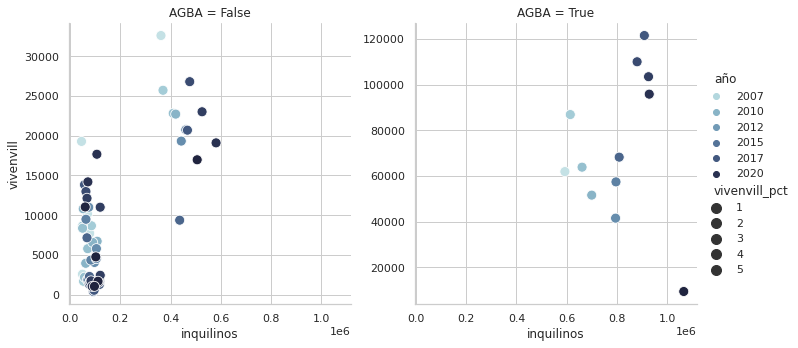

In [ ]:
# hacemos lo mismo que antes pero con AGBA en lugar de región
sns.relplot(
    data=inquilinos_df,
    x="inquilinos", 
    y="vivenvill",
    hue="año", 
    size="vivenvill_pct",
    palette=cmap, 
    sizes=(100,100),
    col='AGBA',
    facet_kws={'sharey': False, 'sharex': True});

Vemos que apartando región por región, el plot empieza a ser más claro. Probemos ploteando individualmente cada región. Además, vamos a ajustar los ejes x e y a [escala logarítmica](https://blog.datawrapper.de/weeklychart-logscale2/) para ver si logramos acentuar alguna diferencia en los valores de los ejes.

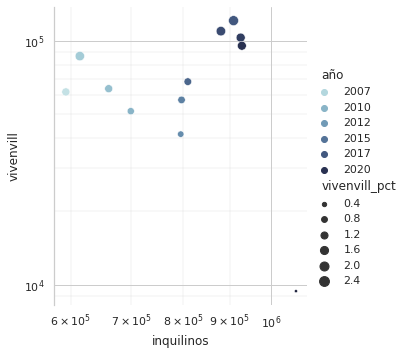

In [ ]:
g = sns.relplot(
    # filtramos la data para plotear solamente una región
    data=inquilinos_df.loc[inquilinos_df['region']=='Gran Buenos Aires'],
    x="inquilinos", 
    y="vivenvill",
    hue="año", 
    size="vivenvill_pct",
    palette=cmap, 
    sizes=(10,100)
    )
# así definimos la escala del eje
g.set(xscale="log", yscale="log")
# dibujamos la grilla en sentido de ambos ejes
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
# borramos las líneas de los ejes. Esto es como "spines" en un ax de matplotlib
g.despine(left=False, bottom=True);

Lo que conseguimos con la escala logarítmica, es básicamente cambiar el orden de magnitud de los ejes. Dado que estamos trabajando con valores poblacionales altos, este efecto resulta muy útil. 

Al visualizar los ejes como potencias de 10, estamos logrando que ...

In [ ]:
# un valor con un rango amplio
7*(10**5) - 6*(10**5)

100000

In [ ]:
# se represente en una escala acotada.
7 - 6

1

In [ ]:
10**5 - 10**4

90000

Entonces, lo que estamos haciendo es ir de 1 en 1 en lugar de 100.000 en 100.000. Esto aplica para ambos ejes. Podemos representar una escala de 100.000 en 100.000 (eje x) o de 10.000 en 10.000 (el eje y) como si fuese de 1 en 1.

Representamos lo mismo, pero al reducir las escalas es como si estuviéramos estirando las burbujas, o poniéndoles una lupa. 

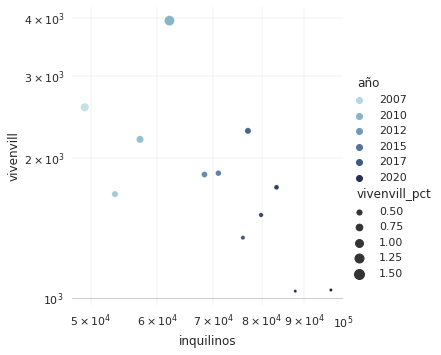

In [ ]:
# Hacemos lo mismo para la Patagonia
g = sns.relplot(
    data=inquilinos_df.loc[inquilinos_df['region']=='Patagónica'],
    x="inquilinos", 
    y="vivenvill",
    hue="año", 
    size="vivenvill_pct",
    palette=cmap, 
    sizes=(10,100))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

In [ ]:
# comparamos las series de valores por año a ver si se parecen ...
inquilinos_df['inquilinos'].corr(inquilinos_df['vivenvill'])

0.8199799030628384

Puede que haya cierta relación, pero eso no necesariamente quiera decir que existe un carácter explicativo ...

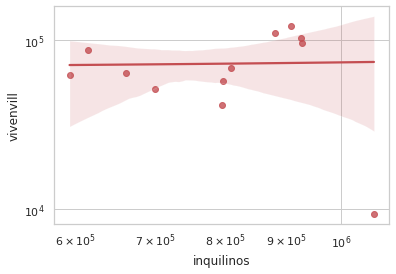

In [ ]:
# La recta no tiene una pendiente definida
g=sns.regplot(
    data=inquilinos_df.loc[inquilinos_df['region']=='Gran Buenos Aires'],
    x="inquilinos", 
    y="vivenvill",
    color='r')
g.set(xscale="log", yscale="log");

Si revisamos algunos plots con la línea de regresión ajustada, vamos a ver que para algunas regiones puede que haya alguna relación. Pero no así en otras ...

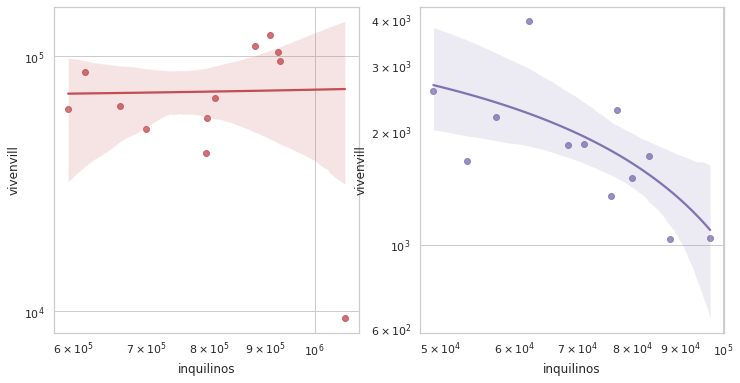

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
g1 = sns.regplot(data=inquilinos_df.loc[inquilinos_df['region']=='Gran Buenos Aires'],
    x="inquilinos", 
    y="vivenvill",  color='r', ax=ax1)
g2 = sns.regplot(data=inquilinos_df.loc[inquilinos_df['region']=='Patagónica'],
    x="inquilinos", 
    y="vivenvill", color='m', ax=ax2)

g1.set(xscale="log", yscale="log")
g2.set(xscale="log", yscale="log");

Por último, vamos a evaluar si existe alguna diferencia signiticativa en los tipos de ocupación de la vivienda entre aquella población que reside en villas y la que no.

Para eso, vamos a apelar una vez más al test de chi-cuadrado.


A continuación, vemos cómo construir nuestra tabla de frecuencias. Dadas las diferencias que tenemos en los tamaños de nuestras poblaciones vamos a usar el parametro `normalize` para utilizar los porcentajes en sentido de las columnas.

In [ ]:
# USAR CONDICION DE OCUPACION DE LA VIVIENDA EN LUGAR DE INGRESOS
freq = pd.crosstab(base['II7_'], base['IV12_3_'],  
                   values=base['PONDERA'], aggfunc='sum', 
                   margins=False, margins_name=None, 
                   normalize='columns') 

In [ ]:
freq

IV12_3_,NO,SI
II7_,,
Inquilinos,0.207484,0.117058
Ocupantes ilegales y otros,0.004444,0.038335
Ocupantes legales,0.097968,0.027319
Propietarios,0.690104,0.817288


Básicamente, lo que queremos ver es si la distribución porcentual de los tipos de ocupación de la vivienda difiere significativamente entre los hogares que residen en villas y los que no.

Como si el hecho de residir en un contexto de informalidad urbana controlara la cantidad de casos en las 4 categorías de ocupación. O que, al menos, tuviese una distribución distinta a la de la población. Siempre hablando en términos de significatividad estadística. Es decir, cuan seguros podríamos estar al respecto si repitieramos el test n veces.

Si tuviéramos que decir algo de nuestra tabla de frecuencias, parecería ser que la cantidad de inquilinos es casi la mitad de lo que hay en contextos de formalidad urbana. Evaluemos cuan probable es esto ...

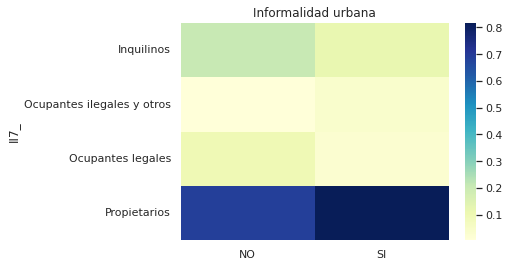

In [ ]:
# seaborn tiene una clase muy útil para representar mapas de calor
ax = plt.axes()
sns.heatmap(freq, annot=False, cmap="YlGnBu", ax=ax)
ax.set_title("Informalidad urbana")
ax.set_xlabel('');

In [ ]:
# importamos la clase chi2_contingency 
from scipy.stats import chi2_contingency

In [ ]:
# para hacer un test de independencia estadística 
c, p, dof, expected = chi2_contingency(freq) 
# Imprimimos el p-value
print(p)

0.991521739562468


Recordemos brevemente lo que estamos testeando. Para eso vamos a plantear nuestra hipótesis

* Ho:La condición de ocupación de la vivienda es independiente del nivel de formalidad urbana.

* Hi:La condición de ocupación no es independiente del nivel de formalidad urbana.

In [ ]:
confianza = 0.95

In [ ]:
print('La probabilidad de que la H0 sea cierta: {}'.format(p))

La probabilidad de que la H0 sea cierta: 0.991521739562468


In [ ]:
if p < 1-confianza:
  print("Rechazamos la hipótesis nula. Existe asociación entre las variables")
else:
  print("No podemos rechazar la hipótesis nula. Es muy probable que ambas distribuciones sean iguales.")

No podemos rechazar la hipótesis nula. Es muy probable que ambas distribuciones sean iguales.


Lamentablemente, la hipótesis nula es demasiado fuerte. Con lo cual, es probable que esas diferencias que vimos entre inquilinos dentro y fuera de villas sean efecto de la muestra.

Si incluyeramos nuevos casos en la muestra, sería muy probable que ambas poblaciones empiecen a emparejarse (en términos de lo que representan porcentualmente dentro de la categoría "condición de ocupación").

# Ejercicios sugeridos

1. Consumir algún trimestre de la eph y calcular el promedio de edad entre hombres y mujeres. No se olviden de expandir la población.

2. Hacer un histograma de la distribución poblacional por grupos de edad. Dispongan el gráfico en dos columnas y ubican a la derecha la curva de densidad.

3. Indagen si la diferencia media de ingresos entre hombres y mujeres es estadísticamente significativa.